In [13]:
import numpy as np
N=100
L=1
T=1
dt=0.1
c=2
dx=0.01
k=(dt*c**2)/(2*dx)
x=np.linspace(0,L,N)
u=100/L*x
U=np.zeros(N)
M=500
count = 0 #time loop start at t=0
while count <M:
    count = count + 1
    for j in range (1,N-1):
        U[j]=k*(u[j+1]-u[j-1])+u[j]
    u[0]=0
    #u[-1]=0
#U

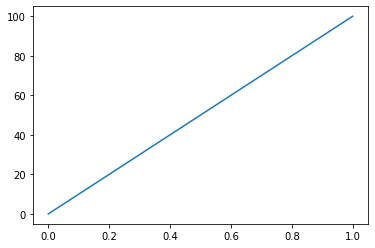

In [14]:
import matplotlib.pylab as plt
plt.plot(x,u)
plt.show()


In [33]:
import numpy as np
import scipy.sparse 
N=10
L=1
T=1
dt=0.1
c=2
dx=0.1
h=(dt*c**2)/(2*dx)
x=np.linspace(0,L,N)
u=100/L*x

In [34]:
diagonals=np.zeros((3,N))#(Recall u0 and uN have been moved to the other side, so N-2)
diagonals[0]=-h
diagonals[1]=1+2*h
diagonals[2]=-h
A=scipy.sparse.spdiags(diagonals,[-1,0,1],N-2,N-2)
A=A.toarray()
#A

In [39]:
b=np.zeros(N) #Initializing vector b
M=5
count = 0 #time loop start at t=0
while count <M:
    count = count + 1
    for j in range(1,N-1): #NB: The range starts from 1 to N-1 instead of starting from 0 to N. So this must be taken care of later
        b[j]=u[j]+h*(u[j+1]+-2*u[j]+u[j-1]) # Your b
        u[0]=0                                  # Boundary condition
        u[-1]=0                                 # Boundary condition

#Taking care of the range
    b2=np.zeros(N-2) #Initializing vector b2 for u0
    b3=np.zeros(N-2) #Initializing vector b2 for uN
    b2[0]=-h*u[0]
    b3[-1]=-h*u[-1]
    #combining the KNOWN SOLUTION
    B=b[1:-1] -(b2+b3)
    
    #To solve u=inv(A)*b
    from numpy.linalg import inv
    S=np.dot(inv(A),B)# Solving by inverse method.
    u[1:-1]=S # NB: S is N-2 dimensions while u is N dimensions so S=u[1:-1]

#Recall u0 and uN had been moved to the other side, they now become part of the KNOWN SOLUTION
b2=np.zeros(N-2) #Initializing vector b2 for u0
b3=np.zeros(N-2) #Initializing vector b2 for uN
b2[0]=-h*u[0]
b3[-1]=-h*u[-1]
#combining the KNOWN SOLUTION
B=b[1:-1] -(b2+b3)
B

#To solve u=inv(A)*b
from numpy.linalg import inv
S=np.dot(inv(A),B)# Solving by inverse method.
u[1:-1]=S # NB: S is N-2 dimensions while u is N dimensions so S=u[1:-1]

[]

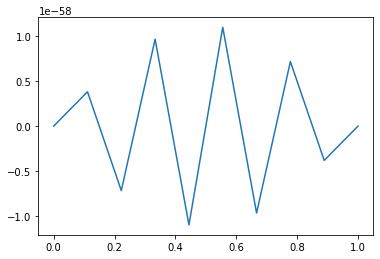

In [40]:
#To plot
import matplotlib.pylab as plt
plt.plot(x,u)
plt.plot()

In [49]:
import numpy as np
import scipy.sparse 
from numpy.linalg import inv
dt=0.1
N=100
c=2
L=1
dy=0.01
L1=(dt*c**2)/(2*dy)
x=np.linspace(0,1,N)
u=100/L*x
b=np.zeros(N)
j=0
while j<=N-3:
    j=j+1
    b[j]=u[j]+L1*(u[j+1]+-2*u[j]+u[j-1])
    u[0]=0                                  # Boundary condition
#u[-1]=0

In [50]:
diagonals=np.zeros((3,N))#(Recall u0 and uN have been moved to the other side, so N-2)
diagonals[0]=-L1
diagonals[1]=1+2*L1
diagonals[2]=-L1
A=scipy.sparse.spdiags(diagonals,[0,1,2],N,N)
A=A.toarray()
#A

In [51]:
b0=np.zeros(N)
b0[0]=-L1*u[0]
bn=np.zeros(N)
bn[-1]=-L1*u[-1]
b2=b0+bn
B=b+b2

U=np.dot(inv(A),B)

[]

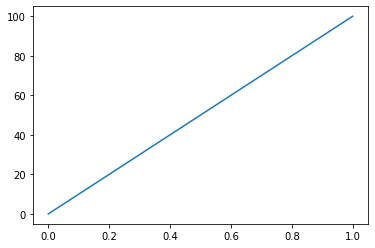

In [52]:
import matplotlib.pylab as plt
plt.plot(x,u)
plt.plot()